In [110]:
import pandas as pd
import numpy as np
from utilsforecast.plotting import plot_series
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
import seaborn as sns




In [94]:
recession_df = pd.read_csv("../data/combined/recession_probability.csv")



In [95]:
recession_df.dtypes

date                              object
recession_probability            float64
1_month_recession_probability    float64
3_month_recession_probability    float64
6_month_recession_probability    float64
1_year_rate                      float64
3_months_rate                    float64
6_months_rate                    float64
CPI                              float64
INDPRO                           float64
10_year_rate                     float64
share_price                      float64
unemployment_rate                float64
PPI                              float64
OECD_CLI_index                   float64
CSI_index                        float64
Business_Quarter                  object
Month                             object
Country                           object
dtype: object

In [96]:
recession_df.drop(['Country'], axis=1, inplace=True)

In [97]:
recession_df.dtypes

date                              object
recession_probability            float64
1_month_recession_probability    float64
3_month_recession_probability    float64
6_month_recession_probability    float64
1_year_rate                      float64
3_months_rate                    float64
6_months_rate                    float64
CPI                              float64
INDPRO                           float64
10_year_rate                     float64
share_price                      float64
unemployment_rate                float64
PPI                              float64
OECD_CLI_index                   float64
CSI_index                        float64
Business_Quarter                  object
Month                             object
dtype: object

In [98]:
recession_df['date'] = pd.to_datetime(recession_df['date'])

recession_df['Year'] = recession_df['date'].dt.year

In [99]:
recession_df.dtypes

date                             datetime64[ns]
recession_probability                   float64
1_month_recession_probability           float64
3_month_recession_probability           float64
6_month_recession_probability           float64
1_year_rate                             float64
3_months_rate                           float64
6_months_rate                           float64
CPI                                     float64
INDPRO                                  float64
10_year_rate                            float64
share_price                             float64
unemployment_rate                       float64
PPI                                     float64
OECD_CLI_index                          float64
CSI_index                               float64
Business_Quarter                         object
Month                                    object
Year                                      int32
dtype: object

In [100]:
# Map for Business_Quarter
quarter_map = {
    'Q1': 1,
    'Q2': 2,
    'Q3': 3,
    'Q4': 4
}
recession_df['Quarter_Number'] = recession_df['Business_Quarter'].map(quarter_map)

# Map for Month names
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
recession_df['Month_Number'] = recession_df['Month'].map(month_map)


In [101]:
recession_df.dtypes

date                             datetime64[ns]
recession_probability                   float64
1_month_recession_probability           float64
3_month_recession_probability           float64
6_month_recession_probability           float64
1_year_rate                             float64
3_months_rate                           float64
6_months_rate                           float64
CPI                                     float64
INDPRO                                  float64
10_year_rate                            float64
share_price                             float64
unemployment_rate                       float64
PPI                                     float64
OECD_CLI_index                          float64
CSI_index                               float64
Business_Quarter                         object
Month                                    object
Year                                      int32
Quarter_Number                            int64
Month_Number                            

In [102]:
recession_df

,date,recession_probability,1_month_recession_probability,3_month_recession_probability,6_month_recession_probability,1_year_rate,3_months_rate,6_months_rate,CPI,INDPRO,...,share_price,unemployment_rate,PPI,OECD_CLI_index,CSI_index,Business_Quarter,Month,Year,Quarter_Number,Month_Number
0,1967-02-01,NaN,NaN,NaN,0.00,4.574444,4.561111,4.590556,33.000,34.7650,...,4.733288,3.8,27.200,98.590266,94.1,Q1,February,1967,1,2
1,1967-03-01,NaN,NaN,0.80,0.26,4.185000,4.259091,4.221818,33.000,34.5691,...,4.854181,3.8,27.200,98.606358,94.1,Q1,March,1967,1,3
2,1967-04-01,NaN,NaN,0.50,0.08,3.898500,3.837500,3.894500,33.100,34.8951,...,4.943822,3.8,27.200,98.745387,94.1,Q2,April,1967,2,4
3,1967-05-01,NaN,0.80,0.00,0.00,3.885000,3.603182,3.799545,33.100,34.5907,...,5.050295,3.8,27.200,98.993997,95.9,Q2,May,1967,2,5
4,1967-06-01,0.80,0.50,0.26,0.00,4.164545,3.535909,3.889545,33.300,34.5863,...,5.005238,3.9,27.200,99.304794,95.9,Q2,June,1967,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2025-01-01,0.26,0.10,0.46,NaN,4.003333,4.210000,4.150952,319.086,102.8805,...,183.046100,4.0,442.760,100.359412,71.7,Q1,January,2025,1,1
696,2025-02-01,0.10,0.14,1.64,NaN,4.013684,4.215789,4.187368,319.775,103.9397,...,187.784900,4.1,439.469,100.354061,64.7,Q1,February,2025,1,2
697,2025-03-01,0.14,0.46,NaN,NaN,3.897619,4.199524,4.097143,319.615,103.6682,...,182.063000,4.2,456.503,100.318777,57.0,Q1,March,2025,1,3
698,2025-04-01,0.46,1.64,NaN,NaN,3.798571,4.209048,4.048095,320.321,103.6912,...,173.003800,4.2,477.283,100.298363,52.2,Q2,April,2025,2,4


/var/folders/vx/lz_s92194473v0lcw_034qq40000gn/T/ipykernel_20051/4034391091.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_avg.index, y=quarterly_avg.values, palette='Blues_d')


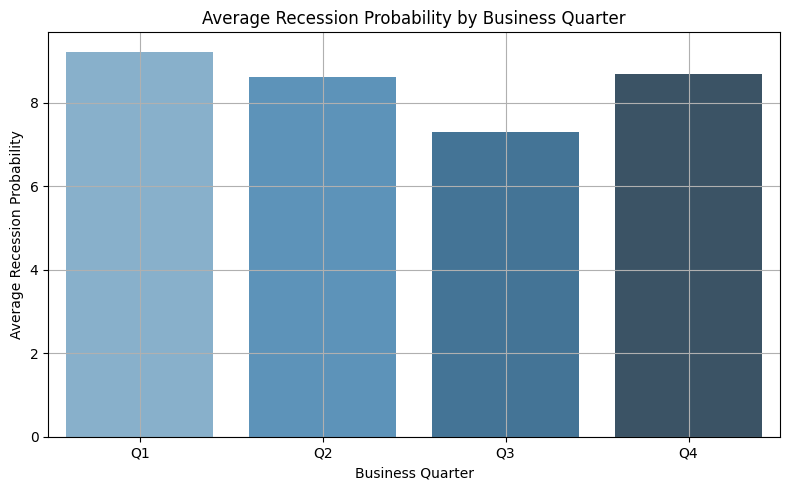

In [106]:
# Group by Business Quarter and calculate mean
quarterly_avg = recession_df.groupby('Business_Quarter')['recession_probability'].mean().reindex(['Q1', 'Q2', 'Q3', 'Q4'])

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=quarterly_avg.index, y=quarterly_avg.values, palette='Blues_d')
plt.title('Average Recession Probability by Business Quarter')
plt.xlabel('Business Quarter')
plt.ylabel('Average Recession Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/vx/lz_s92194473v0lcw_034qq40000gn/T/ipykernel_20051/4270841826.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_avg = recession_df.groupby('Month')['recession_probability'].mean().reindex(month_order)


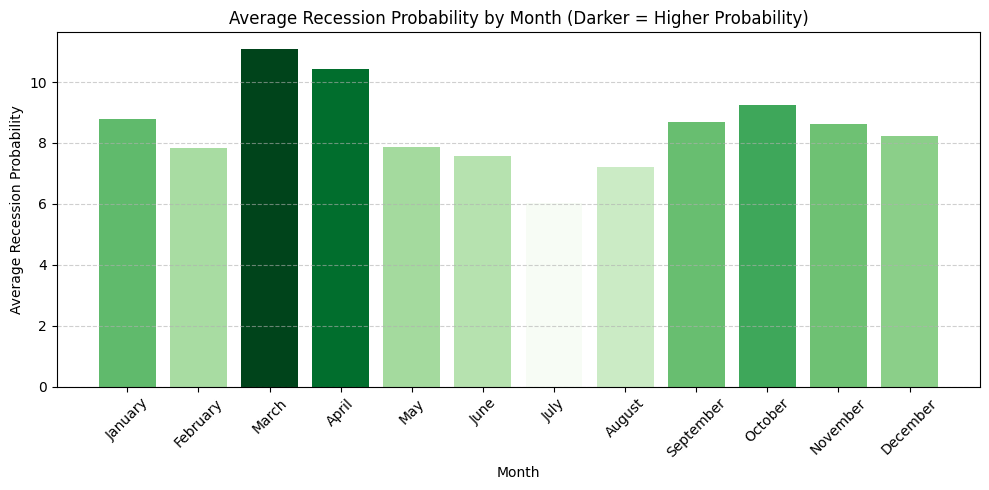

In [107]:
# Ensure Month is in correct order
month_order = list(calendar.month_name)[1:]  # ['January', ..., 'December']
recession_df['Month'] = pd.Categorical(recession_df['Month'], categories=month_order, ordered=True)

# Compute average probabilities per month
monthly_avg = recession_df.groupby('Month')['recession_probability'].mean().reindex(month_order)

# Normalize the values for color intensity
norm = plt.Normalize(monthly_avg.min(), monthly_avg.max())
colors = plt.cm.Greens(norm(monthly_avg.values))  # Darker green = higher value

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(month_order, monthly_avg.values, color=colors)
plt.title('Average Recession Probability by Month (Darker = Higher Probability)')
plt.xlabel('Month')
plt.ylabel('Average Recession Probability')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [108]:
recession_df.columns

Index(['date', 'recession_probability', '1_month_recession_probability',
       '3_month_recession_probability', '6_month_recession_probability',
       '1_year_rate', '3_months_rate', '6_months_rate', 'CPI', 'INDPRO',
       '10_year_rate', 'share_price', 'unemployment_rate', 'PPI',
       'OECD_CLI_index', 'CSI_index', 'Business_Quarter', 'Month', 'Year',
       'Quarter_Number', 'Month_Number'],
      dtype='object')

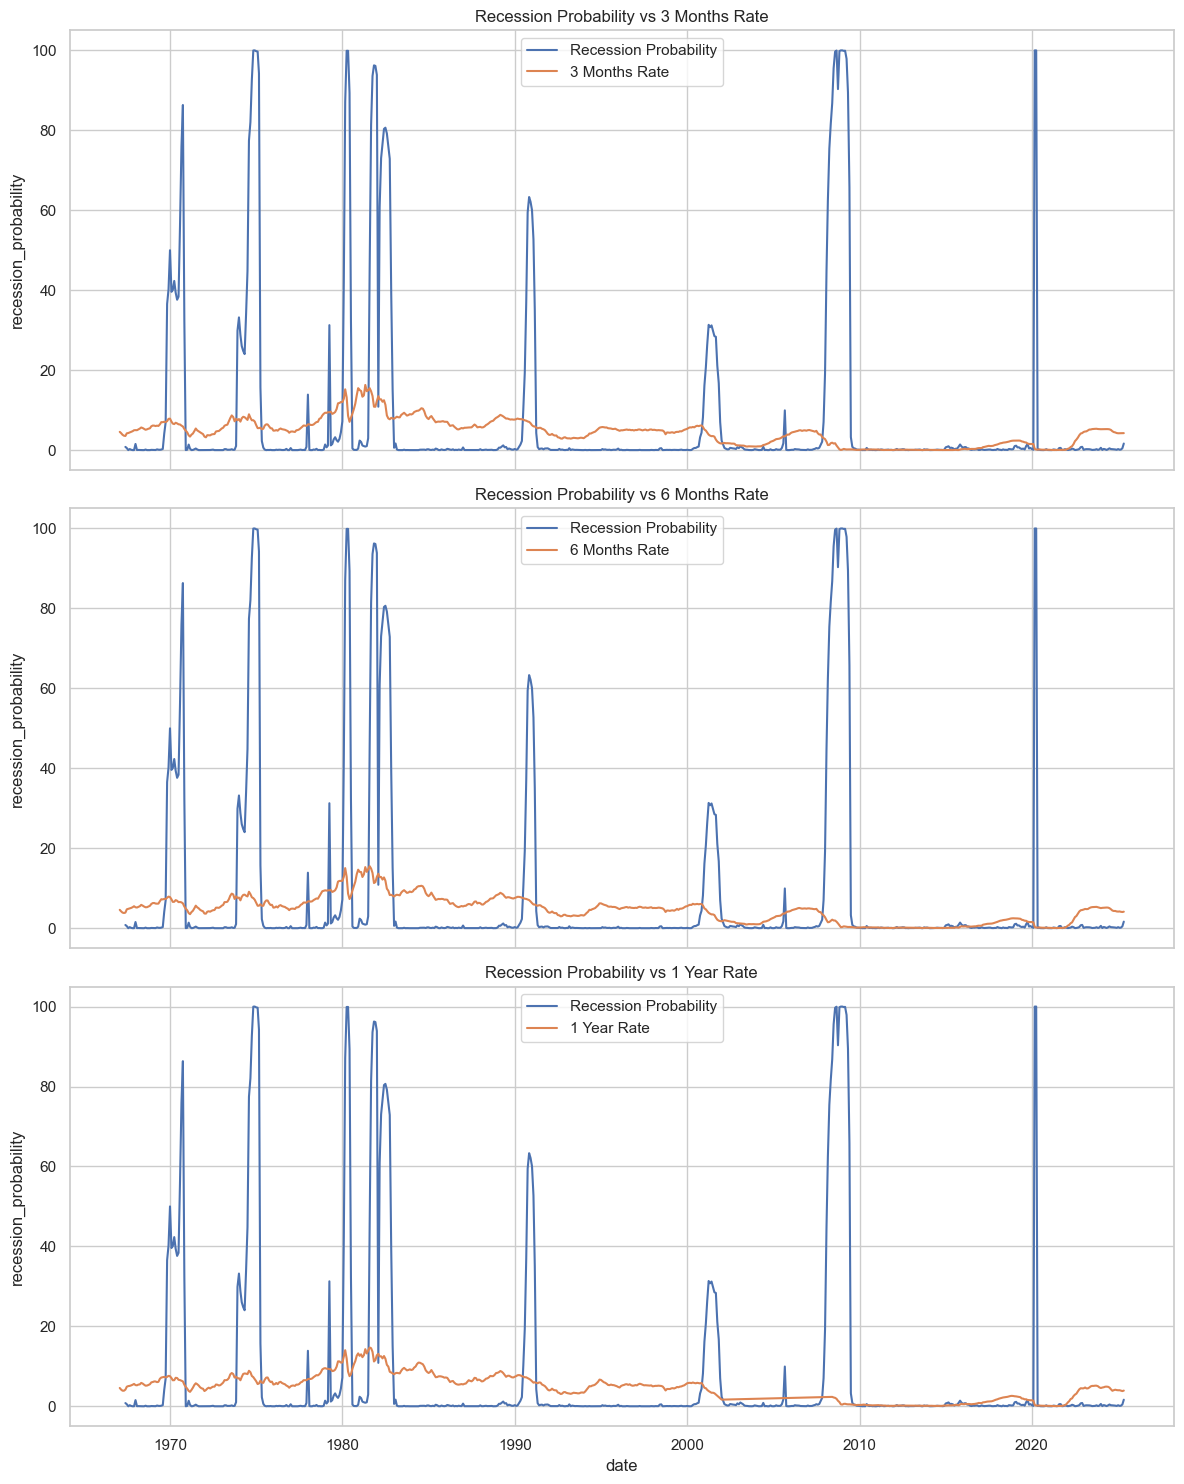

In [113]:
# Set style
sns.set(style="whitegrid")

# Create figure and axes
fig, axs = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Plot 1: Recession Probability vs 3-months Rate
sns.lineplot(data=recession_df, x='date', y='recession_probability', label='Recession Probability', ax=axs[0])
sns.lineplot(data=recession_df, x='date', y='3_months_rate', label='3 Months Rate', ax=axs[0])
axs[0].set_title('Recession Probability vs 3 Months Rate')
axs[0].legend()

# Plot 2: Recession Probability vs 6-months Rate
sns.lineplot(data=recession_df, x='date', y='recession_probability', label='Recession Probability', ax=axs[1])
sns.lineplot(data=recession_df, x='date', y='6_months_rate', label='6 Months Rate', ax=axs[1])
axs[1].set_title('Recession Probability vs 6 Months Rate')
axs[1].legend()

# Plot 3: Recession Probability vs 1-year Rate
sns.lineplot(data=recession_df, x='date', y='recession_probability', label='Recession Probability', ax=axs[2])
sns.lineplot(data=recession_df, x='date', y='1_year_rate', label='1 Year Rate', ax=axs[2])
axs[2].set_title('Recession Probability vs 1 Year Rate')
axs[2].legend()

# Improve layout
plt.tight_layout()
plt.show()

During recession looks like all interest rates of long term securities go down